This project is dividing in several phases like:
Business Understand-Data Collection-Data Preparation - EDA & Modelling the model 


***Business Understand.***

This case is about a bank (Thera Bank) whose management wants to explore ways of converting 
its liability customers to personal loan customers (while retaining them as depositors).
A campaign that the bank ran last year for liability customers showed a healthy conversion
rate of over 9% success. This has encouraged the retail marketing department to devise campaigns
with better target marketing to increase the success ratio with minimal budget.

Goal is to Predict whether a customer will respond to a Personal Loan Campaign!

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Importing classes
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split

**Data Collection**

In [3]:
#Loading the dataset
loan= pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
#Let's look at the Top five rows in the dataset
loan.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Making a copy of the original dataset
loan1= loan.copy()

Data preparation & EDA

In [6]:
#Let's see if there are any missing value
loan1.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

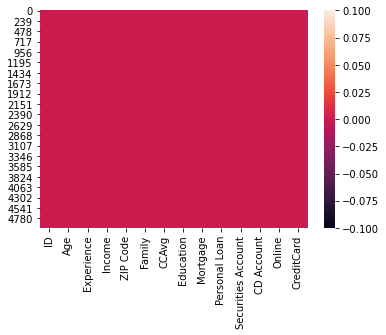

In [8]:
#Let's check out with Seaborn
sns.heatmap(loan1.isnull());

In [9]:
#Check out any duplicated data
loan1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [10]:
#check out the correlation between the attributes
correlation= loan1.corr()
correlation

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


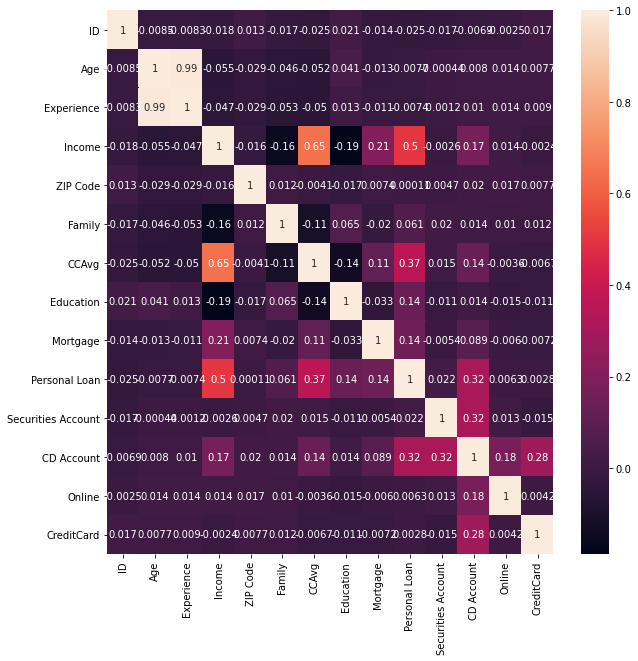

In [12]:
#checking out the correlation with seaborn
correlation= loan1.corr()
f, ax= plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot=True);

In [13]:
#check out target's correlation with others
corre_target= loan1.corr()['Personal Loan'].sort_values()
corre_target

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
ZIP Code              0.000107
CreditCard            0.002802
Online                0.006278
Securities Account    0.021954
Family                0.061367
Education             0.136722
Mortgage              0.142095
CD Account            0.316355
CCAvg                 0.366889
Income                0.502462
Personal Loan         1.000000
Name: Personal Loan, dtype: float64

In [14]:
#let's see how many values total 0 and 1 in the target
loan1['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [15]:
corre_income= loan1.corr()['Income'].sort_values()
corre_income

Education            -0.187524
Family               -0.157501
Age                  -0.055269
Experience           -0.046574
ID                   -0.017695
ZIP Code             -0.016410
Securities Account   -0.002616
CreditCard           -0.002385
Online                0.014206
CD Account            0.169738
Mortgage              0.206806
Personal Loan         0.502462
CCAvg                 0.645984
Income                1.000000
Name: Income, dtype: float64

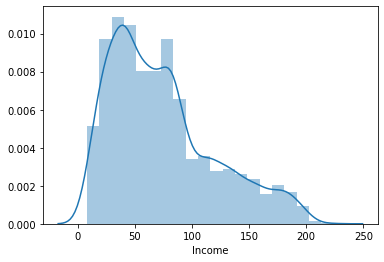

In [16]:
#Seeing how looks like the distribution of the income
sns.distplot(loan1['Income'], bins= 20)

In [17]:
#let's check Skewness
from scipy import stats
skewness= stats.skew(loan1.Income)
print('valor skewness=', skewness)

valor skewness= 0.8410861846424931


Now ,we see that the distribution of skewness equal to 0.841, that means we have a positive skewness

In [18]:
corre_target= loan1.corr()['CCAvg'].sort_values()
corre_target

Education            -0.136124
Family               -0.109275
Age                  -0.052012
Experience           -0.050077
ID                   -0.024675
CreditCard           -0.006689
ZIP Code             -0.004061
Online               -0.003611
Securities Account    0.015086
Mortgage              0.109905
CD Account            0.136534
Personal Loan         0.366889
Income                0.645984
CCAvg                 1.000000
Name: CCAvg, dtype: float64

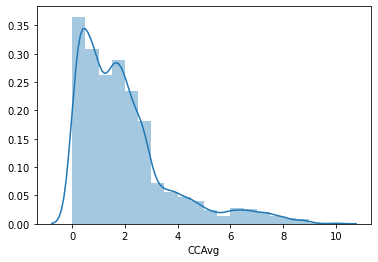

In [19]:
#Seeing the target's distribution
sns.distplot(loan1['CCAvg'], bins= 20)

In [20]:
#let's check Skewness
from scipy import stats
skewness= stats.skew(loan1.CCAvg)
print('valor skewness=', skewness)

valor skewness= 1.5979637637001873


In [21]:
#Let's create the input feature X and our target y
x= loan1.drop(['ID','ZIP Code','Personal Loan', 'Experience'], axis= 1).values
x.shape

(5000, 10)

In [22]:
y= loan1['Personal Loan'].values
y.shape

(5000,)

*Divide the Dataset into  training and  testing*

In [23]:
#let's split the data into training set and testing set
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.3, random_state= 42)
X_train.shape, X_test.shape

((3500, 10), (1500, 10))

In [24]:
print("the training set valor of the X_train is:{}".format(X_train.shape))
print("the testing set valor of the X_test is :{}".format(X_test.shape))

Y_train.shape, Y_test.shape

the training set valor of the X_train is:(3500, 10)
the testing set valor of the X_test is :(1500, 10)


((3500,), (1500,))

*Training Models*

In [25]:
#Training the models
naive= GaussianNB()
naive.fit(X_train, Y_train)

GaussianNB()

Evaluating on the training set

In [26]:
#prediction on the training set
pred_xtrain= naive.predict(X_train)
pred_xtrain

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Check out the Performance of our classificatiom model**

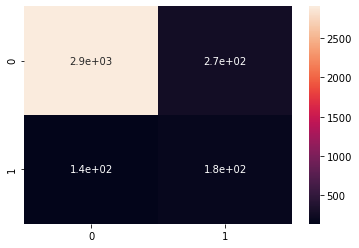

In [27]:
cm= confusion_matrix(Y_train, pred_xtrain)
sns.heatmap(cm, annot=True)

In [28]:
# Check out the accuracy on the training set
Accuracy= accuracy_score(Y_train, pred_xtrain)
print('valor accuracy for xtrain:', Accuracy)

valor accuracy for xtrain: 0.8822857142857143


In [29]:
print(classification_report(Y_train, pred_xtrain))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3177
           1       0.40      0.57      0.47       323

    accuracy                           0.88      3500
   macro avg       0.68      0.74      0.70      3500
weighted avg       0.90      0.88      0.89      3500



*Testing Model on the testing set*

In [30]:
pred_xtest= naive.predict(X_test)
pred_xtest

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

**Check out the Performance of our classificatiom model**

In [31]:
print(classification_report(Y_test, pred_xtest))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.49      0.60      0.54       157

    accuracy                           0.89      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.90      0.89      0.90      1500



In [32]:
Accuracy= accuracy_score(Y_test, pred_xtest)

In [33]:
print('valor accuracy:', Accuracy)

valor accuracy: 0.892


*Random Forest Classifier Class*

In [34]:
# the Random Forest Classifier class
rfc= RandomForestClassifier(n_estimators= 200)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
rfc_pred= rfc.predict(X_train)
rfc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
#calculating the accuracy of the model with X_train
rfc_accuracy= accuracy_score(Y_train, rfc_pred)
print('valor accyracy:',rfc_accuracy)

valor accyracy: 1.0


* Testing model on the testing set*

In [37]:
rfc_xtest= rfc.predict(X_test)
rfc_xtest

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [38]:
#calculating the accuracy of the model with X_test
accuracy_xtest= accuracy_score(Y_test, rfc_xtest)
print('valor accuracy:', accuracy_xtest)

valor accuracy: 0.99


* One more Class*

In [39]:
# The logistic Regression
classifier= LogisticRegression(random_state= 42)
classifier.fit(X_train, Y_train)

C:\Users\katol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [40]:
# Making prediction on the test set
pred_xtest1= classifier.predict(X_test)
pred_xtest

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [ ]:
**Check out the Performance of our classificatiom model**

In [41]:
print(classification_report(Y_test, pred_xtest1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.82      0.54      0.65       157

    accuracy                           0.94      1500
   macro avg       0.89      0.76      0.81      1500
weighted avg       0.93      0.94      0.93      1500



In [42]:
# Check out the accuracy on the testing set
Accuracy= accuracy_score(Y_test, pred_xtest1)
print('valor accuracy for x_test:', Accuracy)

valor accuracy for x_test: 0.9393333333333334


In [41]:
# Compare the accuracy of the classse
print("the accuracy for naive class:0.89")
print("the accuracy for randomforestclassifier class:0.98")
print("the accuracy for logisticregression class:0.93")

the accuracy for naive class:0.89
the accuracy for randomforestclassifier class:0.98
the accuracy for logisticregression class:0.93


the best machine learning model for this classification problem is random forest classifier.

Saving the best accuracy of these machine learning models

In [44]:
import pickle
with open('thebest_pickle', 'wb') as f:
    pickle.dump(rfc,f)

In [45]:
with open('thebest_pickle', 'rb') as f:
    best= pickle.load(f)

In [46]:
best.predict(X_test)

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)